In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
from google.colab import files
files.upload()


Saving iris.data to iris.data


{'iris.data': b'5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-setosa\n5.2,4.1,1.5,0.1,Iris-setosa\n5.5,4.2,1.4,0.2,Iris-setosa

In [0]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('iris.data', names=names)

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt

TypeError: ignored

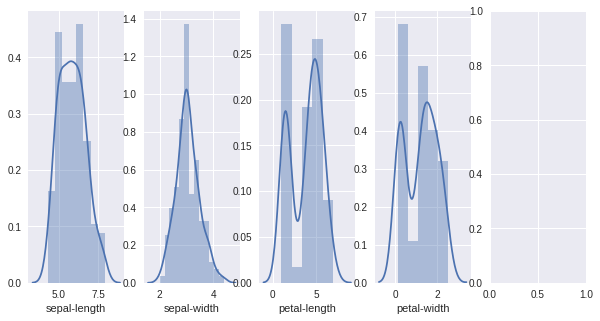

In [16]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(10,5))

index = 0

for k,v in df.items():
  sb.distplot(v, ax=axes[index])
  index += 1

In [0]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [0]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [6]:
dummy_y[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
def model():
  model = Sequential()
  model.add(Dense(8, input_dim=4, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model

In [13]:
model().fit(X, dummy_y, batch_size=1, epochs=30)

Epoch 1/30
150/150 [==============================] - 1s 6ms/step - loss: 1.0223 - acc: 0.5333
Epoch 2/30
150/150 [==============================] - 1s 5ms/step - loss: 0.8120 - acc: 0.6333
Epoch 3/30
150/150 [==============================] - 1s 5ms/step - loss: 0.7299 - acc: 0.6267
Epoch 4/30
150/150 [==============================] - 1s 5ms/step - loss: 0.6644 - acc: 0.5733
Epoch 5/30
150/150 [==============================] - 1s 5ms/step - loss: 0.6101 - acc: 0.6600
Epoch 6/30
150/150 [==============================] - 1s 5ms/step - loss: 0.5718 - acc: 0.7200
Epoch 7/30
150/150 [==============================] - 1s 5ms/step - loss: 0.5376 - acc: 0.7533
Epoch 8/30
150/150 [==============================] - 1s 5ms/step - loss: 0.5116 - acc: 0.7467
Epoch 9/30
150/150 [==============================] - 1s 5ms/step - loss: 0.4870 - acc: 0.8000
Epoch 10/30
150/150 [==============================] - 1s 5ms/step - loss: 0.4635 - acc: 0.8067
Epoch 11/30
150/150 [============================